# StreamFlix Data Analysis - All Visualization Code

This notebook contains all the Python code used to generate charts for the StreamFlix Product Analyst Technical Assessment.

**Data Analysis Period:** January - June 2024  
**Dataset:** 80,000 sessions across 5,000 users

## Setup and Data Loading

In [1]:
# Install required packages (uncomment if needed)
# !pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for professional charts
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Professional color palette
colors = ['#2C3E50', '#3498DB', '#1ABC9C', '#E74C3C', '#9B59B6', '#F39C12']

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
# Load data
# Update the path to your CSV file location
df = pd.read_csv('streamflix_sessions.csv')

# Convert date column
df['session_date'] = pd.to_datetime(df['session_date'])
df['month'] = df['session_date'].dt.to_period('M')
df['month_str'] = df['session_date'].dt.strftime('%Y-%m')

# Display basic info
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {df['session_date'].min()} to {df['session_date'].max()}")
print(f"Unique Users: {df['user_id'].nunique()}")
print(f"Total Minutes: {df['minutes_watched'].sum():,}")
df.head()

Dataset Shape: (80000, 8)
Date Range: 2024-01-01 00:00:00 to 2024-06-30 00:00:00
Unique Users: 5000
Total Minutes: 3,193,085


,user_id,session_date,content_type,device_type,subscription_tier,minutes_watched,month,month_str
0,user_00007,2024-01-01,movie,mobile,basic,23,2024-01,2024-01
1,user_00041,2024-01-01,movie,web,premium,76,2024-01,2024-01
2,user_00043,2024-01-01,movie,mobile,standard,47,2024-01,2024-01
3,user_00047,2024-01-01,movie,mobile,premium,11,2024-01,2024-01
4,user_00047,2024-01-01,tv_show,mobile,basic,72,2024-01,2024-01


## Prepare Monthly Aggregated Data

In [4]:
# Monthly aggregations
monthly = df.groupby('month_str').agg({
    'user_id': 'nunique',
    'session_date': 'count',
    'minutes_watched': ['sum', 'mean']
}).round(2)
monthly.columns = ['MAU', 'Sessions', 'Total_Minutes', 'Avg_Minutes']
monthly['Sessions_Per_User'] = monthly['Sessions'] / monthly['MAU']
monthly['MoM_Growth'] = monthly['Total_Minutes'].pct_change() * 100

print("Monthly Metrics:")
monthly

Monthly Metrics:


,MAU,Sessions,Total_Minutes,Avg_Minutes,Sessions_Per_User,MoM_Growth
month_str,,,,,,
2024-01,4696,13699,572678,41.80,2.917164,NaN
2024-02,4591,12586,513697,40.81,2.741451,-10.299156
2024-03,4705,13827,559069,40.43,2.938789,8.832444
2024-04,4635,13241,519412,39.23,2.856742,-7.093400
2024-05,4686,13562,524079,38.64,2.894153,0.898516
2024-06,4656,13085,504150,38.53,2.810352,-3.802671


---
## Chart 1: Monthly Engagement Trends (4-panel)

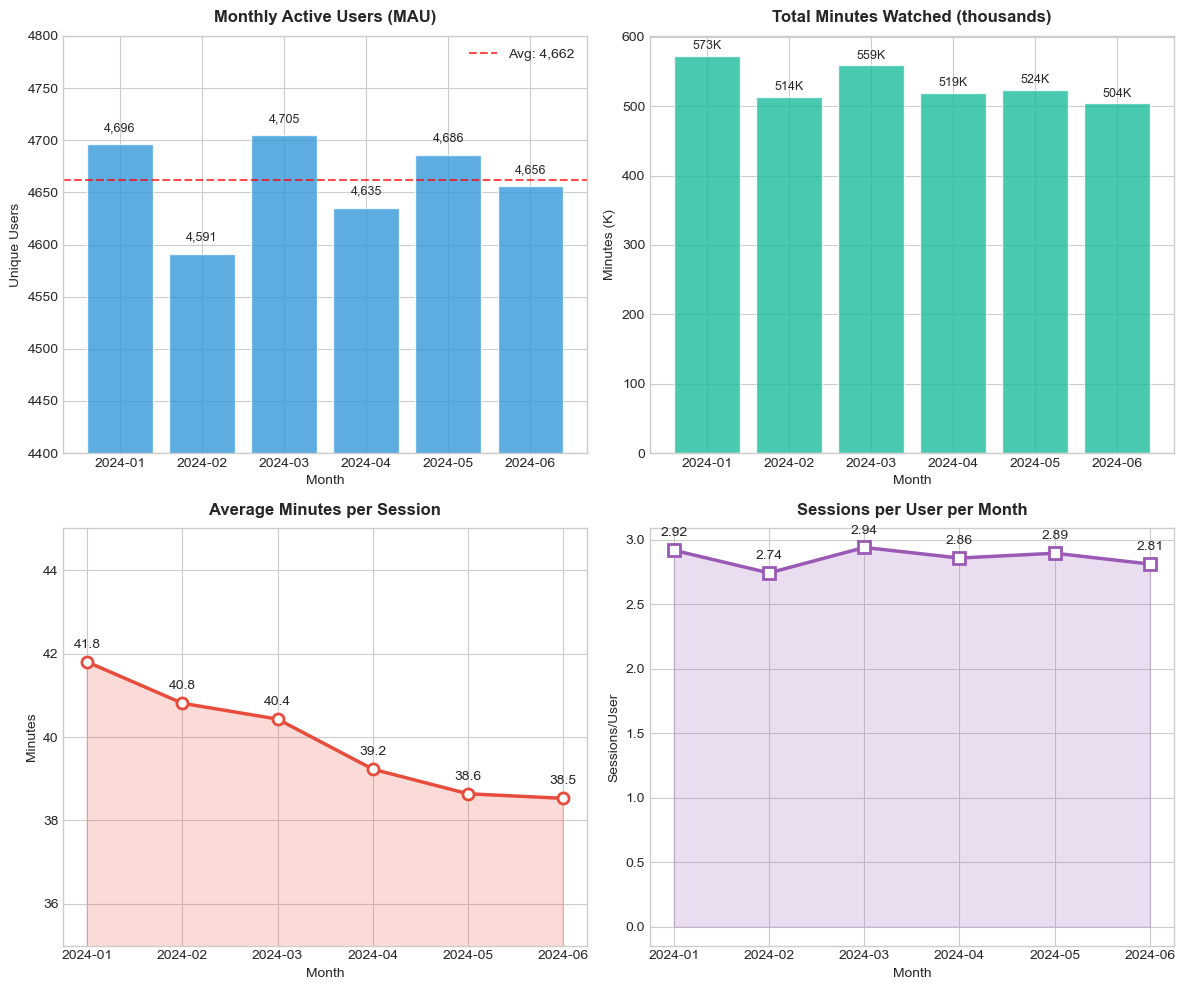

Chart 1 saved: Monthly Engagement Trends


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1a: MAU Trend
ax1 = axes[0, 0]
bars = ax1.bar(monthly.index, monthly['MAU'], color=colors[1], alpha=0.8, edgecolor='white')
ax1.set_title('Monthly Active Users (MAU)', fontweight='bold', pad=10)
ax1.set_xlabel('Month')
ax1.set_ylabel('Unique Users')
ax1.set_ylim(4400, 4800)
for bar, val in zip(bars, monthly['MAU']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{val:,}', 
             ha='center', va='bottom', fontsize=9)
ax1.axhline(y=monthly['MAU'].mean(), color='red', linestyle='--', alpha=0.7, 
            label=f'Avg: {monthly["MAU"].mean():,.0f}')
ax1.legend()

# 1b: Total Minutes Watched
ax2 = axes[0, 1]
bars = ax2.bar(monthly.index, monthly['Total_Minutes']/1000, color=colors[2], alpha=0.8, edgecolor='white')
ax2.set_title('Total Minutes Watched (thousands)', fontweight='bold', pad=10)
ax2.set_xlabel('Month')
ax2.set_ylabel('Minutes (K)')
for bar, val in zip(bars, monthly['Total_Minutes']/1000):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{val:.0f}K', 
             ha='center', va='bottom', fontsize=9)

# 1c: Average Minutes per Session
ax3 = axes[1, 0]
ax3.plot(monthly.index, monthly['Avg_Minutes'], marker='o', markersize=8, 
         linewidth=2.5, color=colors[3], markerfacecolor='white', markeredgewidth=2)
ax3.set_title('Average Minutes per Session', fontweight='bold', pad=10)
ax3.set_xlabel('Month')
ax3.set_ylabel('Minutes')
ax3.set_ylim(35, 45)
ax3.fill_between(monthly.index, monthly['Avg_Minutes'], alpha=0.2, color=colors[3])
for i, (idx, val) in enumerate(zip(monthly.index, monthly['Avg_Minutes'])):
    ax3.annotate(f'{val:.1f}', (idx, val), textcoords="offset points", xytext=(0,10), ha='center')

# 1d: Sessions per User
ax4 = axes[1, 1]
ax4.plot(monthly.index, monthly['Sessions_Per_User'], marker='s', markersize=8, 
         linewidth=2.5, color=colors[4], markerfacecolor='white', markeredgewidth=2)
ax4.set_title('Sessions per User per Month', fontweight='bold', pad=10)
ax4.set_xlabel('Month')
ax4.set_ylabel('Sessions/User')
ax4.fill_between(monthly.index, monthly['Sessions_Per_User'], alpha=0.2, color=colors[4])
for i, (idx, val) in enumerate(zip(monthly.index, monthly['Sessions_Per_User'])):
    ax4.annotate(f'{val:.2f}', (idx, val), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('chart1_monthly_trends.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 1 saved: Monthly Engagement Trends")

---
## Chart 2: Device and Content Analysis (4-panel)

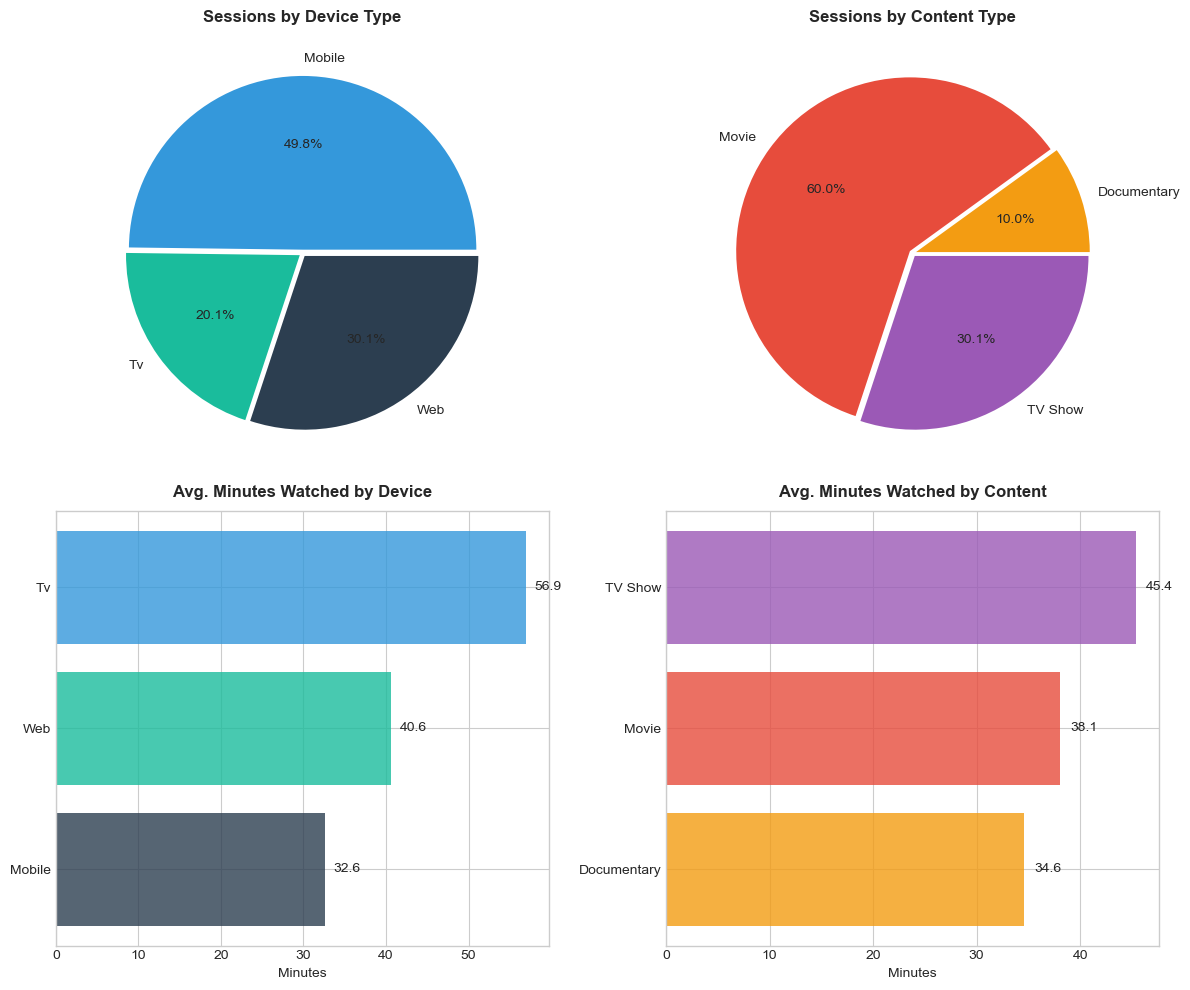

Chart 2 saved: Device and Content Analysis


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 2a: Device Distribution (Pie)
ax1 = axes[0, 0]
device_sessions = df.groupby('device_type')['session_date'].count()
wedges, texts, autotexts = ax1.pie(device_sessions, labels=device_sessions.index.str.title(), 
                                    autopct='%1.1f%%', colors=[colors[1], colors[2], colors[0]],
                                    explode=(0.02, 0.02, 0.02), shadow=False,
                                    textprops={'fontsize': 10})
ax1.set_title('Sessions by Device Type', fontweight='bold', pad=10)

# 2b: Content Type Distribution (Pie)
ax2 = axes[0, 1]
content_sessions = df.groupby('content_type')['session_date'].count()
wedges, texts, autotexts = ax2.pie(content_sessions, labels=['Documentary', 'Movie', 'TV Show'], 
                                    autopct='%1.1f%%', colors=[colors[5], colors[3], colors[4]],
                                    explode=(0.02, 0.02, 0.02), shadow=False,
                                    textprops={'fontsize': 10})
ax2.set_title('Sessions by Content Type', fontweight='bold', pad=10)

# 2c: Avg Minutes by Device
ax3 = axes[1, 0]
device_avg = df.groupby('device_type')['minutes_watched'].mean().sort_values(ascending=True)
bars = ax3.barh(device_avg.index.str.title(), device_avg.values, 
                color=[colors[0], colors[2], colors[1]], alpha=0.8)
ax3.set_title('Avg. Minutes Watched by Device', fontweight='bold', pad=10)
ax3.set_xlabel('Minutes')
for bar, val in zip(bars, device_avg.values):
    ax3.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}', va='center', fontsize=10)

# 2d: Avg Minutes by Content
ax4 = axes[1, 1]
content_avg = df.groupby('content_type')['minutes_watched'].mean().sort_values(ascending=True)
bars = ax4.barh(['Documentary', 'Movie', 'TV Show'], content_avg.values, 
                color=[colors[5], colors[3], colors[4]], alpha=0.8)
ax4.set_title('Avg. Minutes Watched by Content', fontweight='bold', pad=10)
ax4.set_xlabel('Minutes')
for bar, val in zip(bars, content_avg.values):
    ax4.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('chart2_device_content.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 2 saved: Device and Content Analysis")

---
## Chart 3: Subscription Tier Analysis (3-panel)

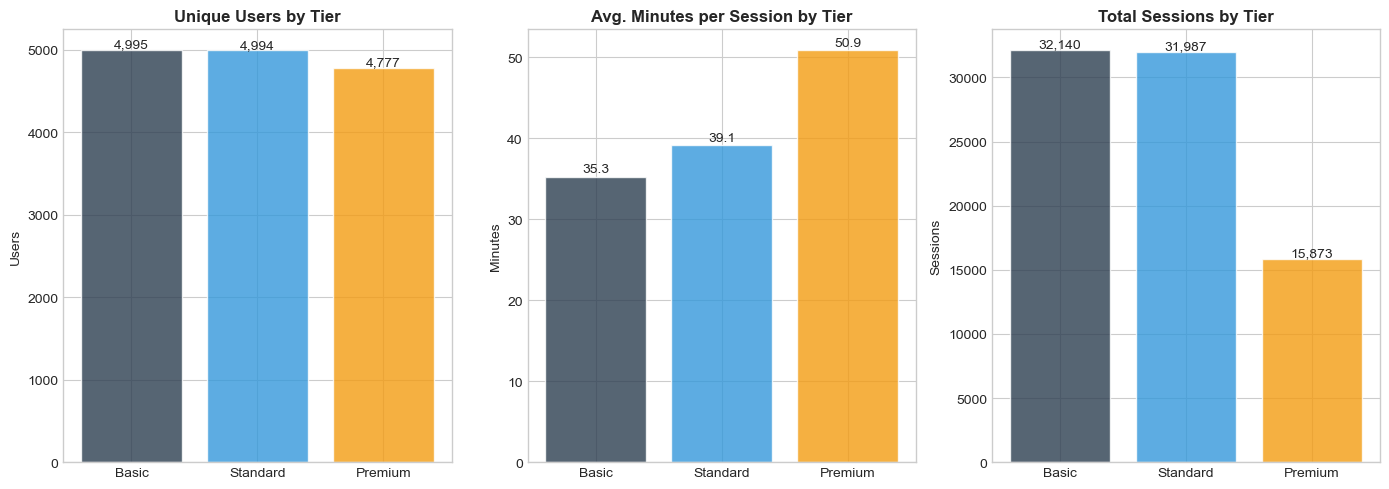

Chart 3 saved: Subscription Tier Analysis


In [7]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

tier_order = ['basic', 'standard', 'premium']
tier_labels = ['Basic', 'Standard', 'Premium']
tier_colors = [colors[0], colors[1], colors[5]]

# 3a: Users by Tier
ax1 = axes[0]
tier_users = df.groupby('subscription_tier')['user_id'].nunique().reindex(tier_order)
bars = ax1.bar(tier_labels, tier_users, color=tier_colors, alpha=0.8, edgecolor='white')
ax1.set_title('Unique Users by Tier', fontweight='bold')
ax1.set_ylabel('Users')
for bar, val in zip(bars, tier_users):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30, f'{val:,}', ha='center', fontsize=10)

# 3b: Avg Minutes by Tier
ax2 = axes[1]
tier_avg = df.groupby('subscription_tier')['minutes_watched'].mean().reindex(tier_order)
bars = ax2.bar(tier_labels, tier_avg, color=tier_colors, alpha=0.8, edgecolor='white')
ax2.set_title('Avg. Minutes per Session by Tier', fontweight='bold')
ax2.set_ylabel('Minutes')
for bar, val in zip(bars, tier_avg):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{val:.1f}', ha='center', fontsize=10)

# 3c: Sessions by Tier
ax3 = axes[2]
tier_sessions = df.groupby('subscription_tier')['session_date'].count().reindex(tier_order)
bars = ax3.bar(tier_labels, tier_sessions, color=tier_colors, alpha=0.8, edgecolor='white')
ax3.set_title('Total Sessions by Tier', fontweight='bold')
ax3.set_ylabel('Sessions')
for bar, val in zip(bars, tier_sessions):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f'{val:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('chart3_subscription_tiers.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 3 saved: Subscription Tier Analysis")

---
## Chart 4: Device Usage Trends Over Time (Stacked Area)

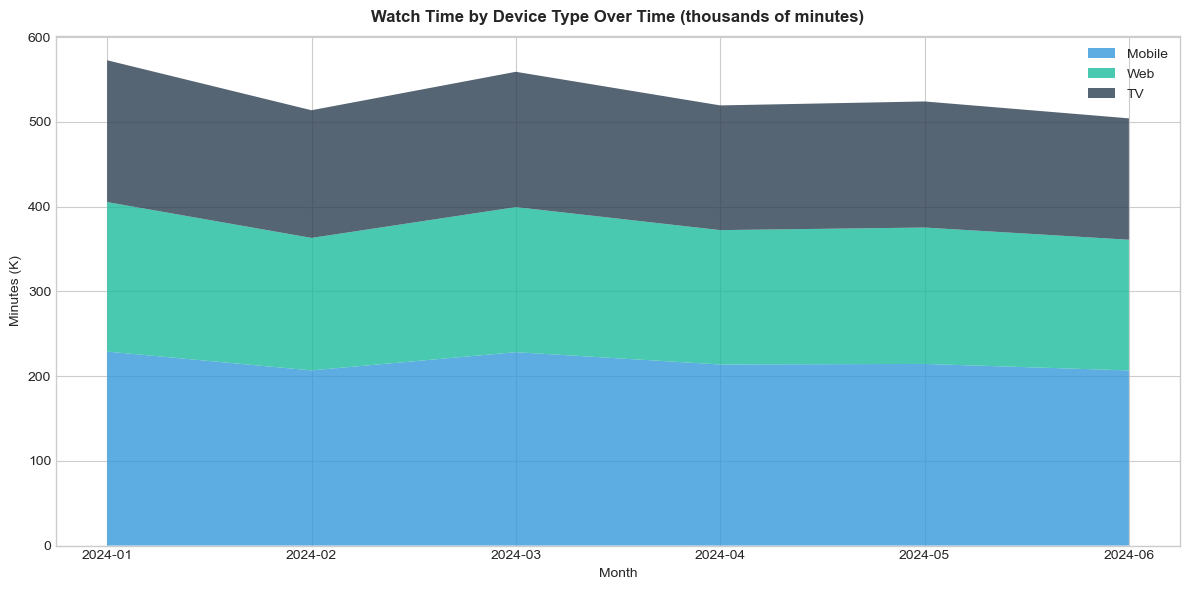

Chart 4 saved: Device Usage Trends


In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

device_monthly = df.groupby(['month_str', 'device_type'])['minutes_watched'].sum().unstack(fill_value=0) / 1000
device_monthly = device_monthly[['mobile', 'web', 'tv']]

ax.stackplot(device_monthly.index, device_monthly['mobile'], device_monthly['web'], device_monthly['tv'],
             labels=['Mobile', 'Web', 'TV'], colors=[colors[1], colors[2], colors[0]], alpha=0.8)
ax.set_title('Watch Time by Device Type Over Time (thousands of minutes)', fontweight='bold', pad=10)
ax.set_xlabel('Month')
ax.set_ylabel('Minutes (K)')
ax.legend(loc='upper right')
ax.set_ylim(0)

plt.tight_layout()
plt.savefig('chart4_device_trends.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 4 saved: Device Usage Trends")

---
## Chart 5: Heatmap - Device × Content Engagement

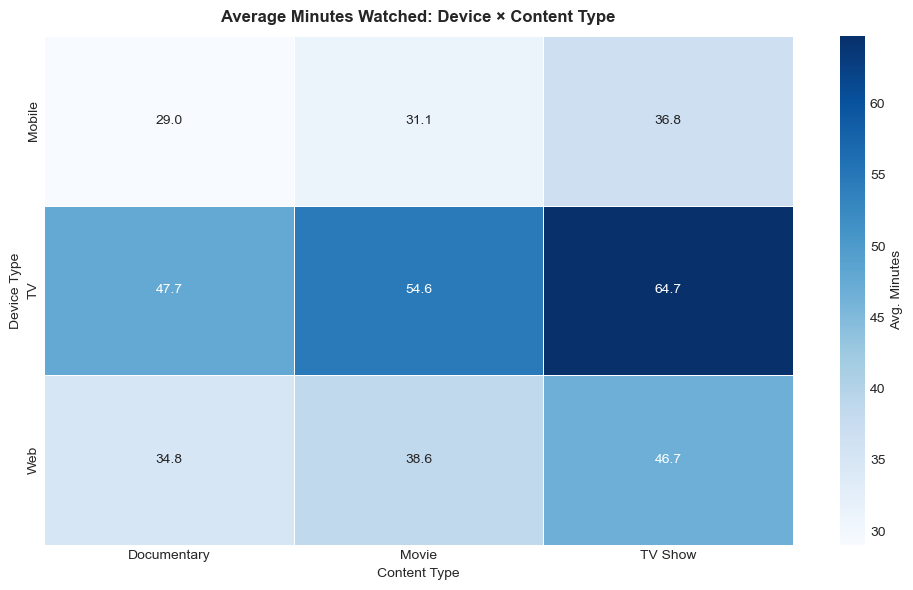

Chart 5 saved: Heatmap - Device x Content


In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

heatmap_data = df.groupby(['device_type', 'content_type'])['minutes_watched'].mean().unstack()
heatmap_data.index = ['Mobile', 'TV', 'Web']
heatmap_data.columns = ['Documentary', 'Movie', 'TV Show']

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Blues', linewidths=0.5,
            ax=ax, cbar_kws={'label': 'Avg. Minutes'})
ax.set_title('Average Minutes Watched: Device × Content Type', fontweight='bold', pad=10)
ax.set_xlabel('Content Type')
ax.set_ylabel('Device Type')

plt.tight_layout()
plt.savefig('chart5_heatmap.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 5 saved: Heatmap - Device x Content")

---
## Chart 6: Month-over-Month Growth Rate

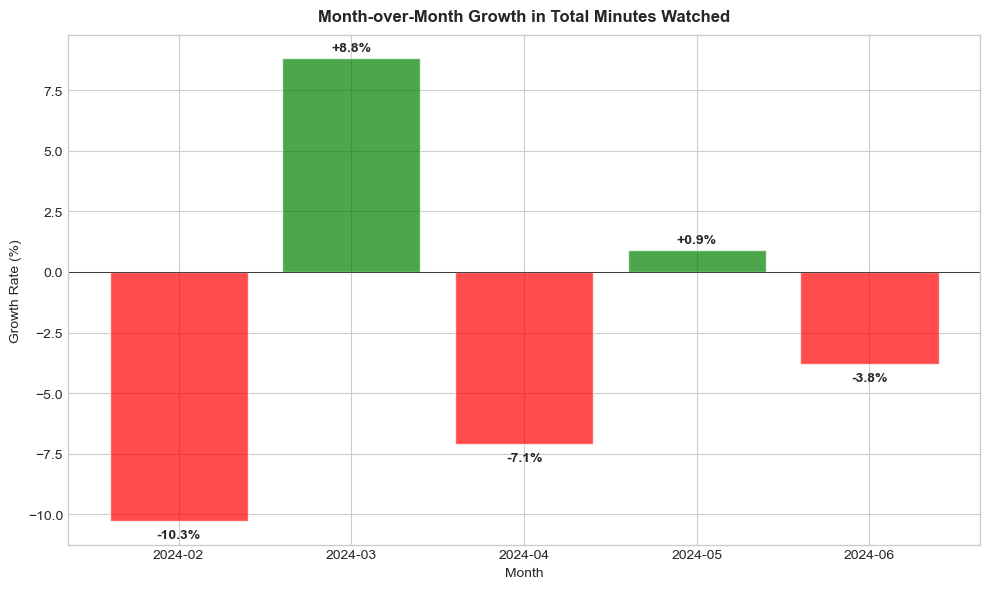

Chart 6 saved: MoM Growth Rate


In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

growth_data = monthly['MoM_Growth'].dropna()
colors_growth = ['green' if x >= 0 else 'red' for x in growth_data.values]

bars = ax.bar(growth_data.index, growth_data.values, color=colors_growth, alpha=0.7, edgecolor='white')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_title('Month-over-Month Growth in Total Minutes Watched', fontweight='bold', pad=10)
ax.set_xlabel('Month')
ax.set_ylabel('Growth Rate (%)')

for bar, val in zip(bars, growth_data.values):
    ypos = val + 0.3 if val >= 0 else val - 0.7
    ax.text(bar.get_x() + bar.get_width()/2, ypos, f'{val:+.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('chart6_mom_growth.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 6 saved: MoM Growth Rate")

---
## Chart 7: Watch Party Metrics Framework Diagram

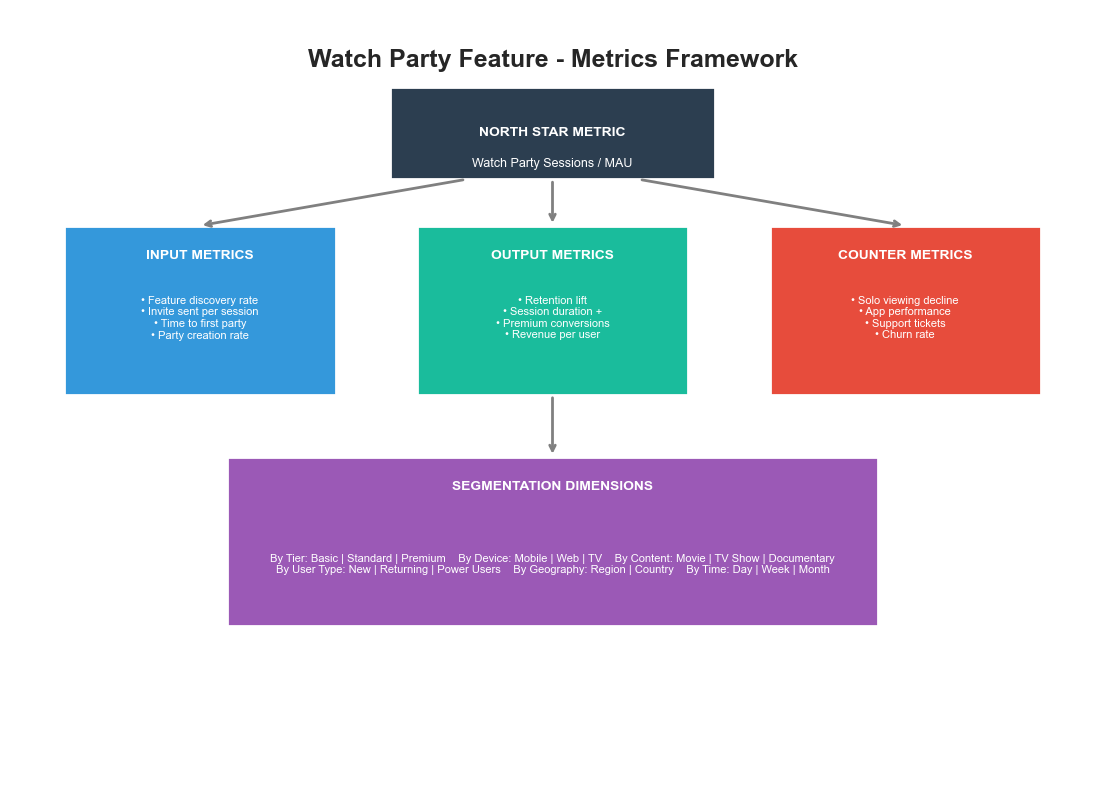

Chart 7 saved: Metrics Framework


In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Title
ax.text(0.5, 0.95, 'Watch Party Feature - Metrics Framework', fontsize=18, fontweight='bold', 
        ha='center', va='top', transform=ax.transAxes)

# North Star
ax.add_patch(plt.Rectangle((0.35, 0.78), 0.3, 0.12, facecolor='#2C3E50', edgecolor='white', linewidth=2))
ax.text(0.5, 0.84, 'NORTH STAR METRIC', fontsize=10, fontweight='bold', ha='center', va='center', color='white')
ax.text(0.5, 0.80, 'Watch Party Sessions / MAU', fontsize=9, ha='center', va='center', color='white')

# Input Metrics
ax.add_patch(plt.Rectangle((0.05, 0.50), 0.25, 0.22, facecolor='#3498DB', edgecolor='white', linewidth=2))
ax.text(0.175, 0.68, 'INPUT METRICS', fontsize=10, fontweight='bold', ha='center', va='center', color='white')
ax.text(0.175, 0.60, '• Feature discovery rate\n• Invite sent per session\n• Time to first party\n• Party creation rate', 
        fontsize=8, ha='center', va='center', color='white')

# Output Metrics
ax.add_patch(plt.Rectangle((0.375, 0.50), 0.25, 0.22, facecolor='#1ABC9C', edgecolor='white', linewidth=2))
ax.text(0.5, 0.68, 'OUTPUT METRICS', fontsize=10, fontweight='bold', ha='center', va='center', color='white')
ax.text(0.5, 0.60, '• Retention lift\n• Session duration +\n• Premium conversions\n• Revenue per user', 
        fontsize=8, ha='center', va='center', color='white')

# Counter Metrics
ax.add_patch(plt.Rectangle((0.7, 0.50), 0.25, 0.22, facecolor='#E74C3C', edgecolor='white', linewidth=2))
ax.text(0.825, 0.68, 'COUNTER METRICS', fontsize=10, fontweight='bold', ha='center', va='center', color='white')
ax.text(0.825, 0.60, '• Solo viewing decline\n• App performance\n• Support tickets\n• Churn rate', 
        fontsize=8, ha='center', va='center', color='white')

# Segmentation
ax.add_patch(plt.Rectangle((0.2, 0.20), 0.6, 0.22, facecolor='#9B59B6', edgecolor='white', linewidth=2))
ax.text(0.5, 0.38, 'SEGMENTATION DIMENSIONS', fontsize=10, fontweight='bold', ha='center', va='center', color='white')
ax.text(0.5, 0.28, 'By Tier: Basic | Standard | Premium    By Device: Mobile | Web | TV    By Content: Movie | TV Show | Documentary\nBy User Type: New | Returning | Power Users    By Geography: Region | Country    By Time: Day | Week | Month', 
        fontsize=8, ha='center', va='center', color='white')

# Arrows
arrow_props = dict(arrowstyle='->', color='gray', lw=2)
ax.annotate('', xy=(0.175, 0.72), xytext=(0.42, 0.78), arrowprops=arrow_props)
ax.annotate('', xy=(0.5, 0.72), xytext=(0.5, 0.78), arrowprops=arrow_props)
ax.annotate('', xy=(0.825, 0.72), xytext=(0.58, 0.78), arrowprops=arrow_props)
ax.annotate('', xy=(0.5, 0.42), xytext=(0.5, 0.50), arrowprops=arrow_props)

plt.savefig('chart7_metrics_framework.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 7 saved: Metrics Framework")

---
## Chart 8: Financial Model Comparison (Original vs Licensed Content)

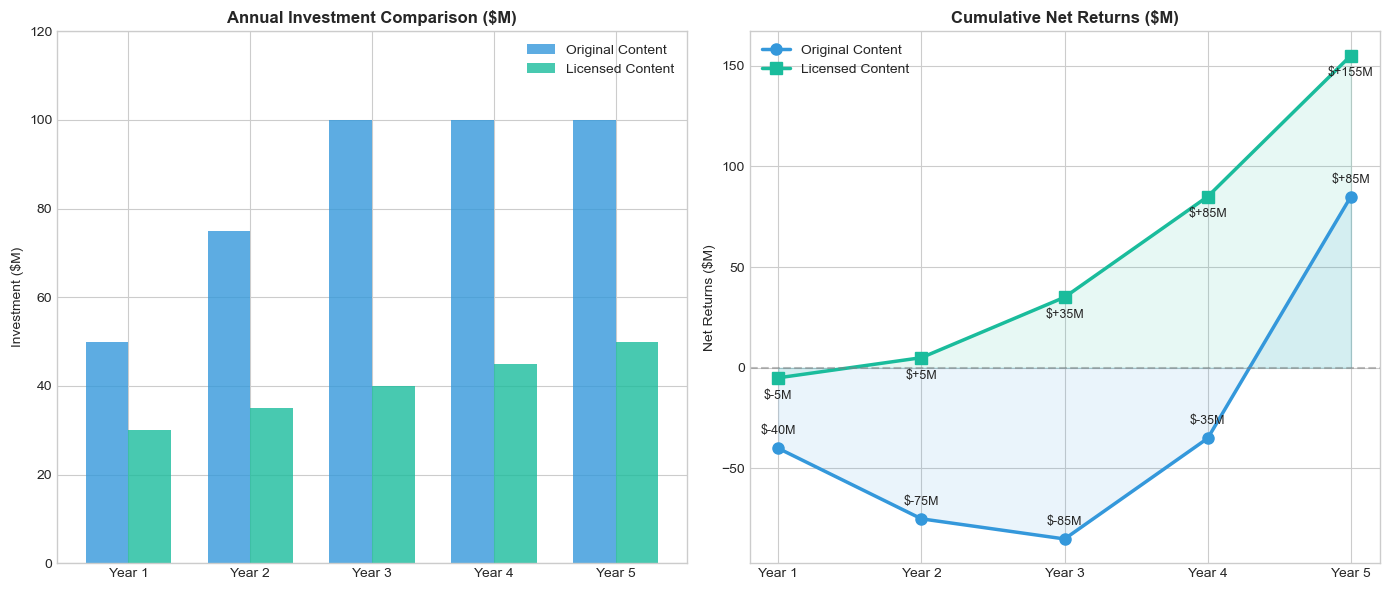

Chart 8 saved: Financial Model Comparison


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

years = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']

# Original Content Strategy
original_investment = [50, 75, 100, 100, 100]  # $M
original_revenue = [10, 40, 90, 150, 220]  # $M
original_net = [-40, -35, -10, 50, 120]

# Licensed Content Strategy
licensed_investment = [30, 35, 40, 45, 50]  # $M
licensed_revenue = [25, 45, 70, 95, 120]  # $M
licensed_net = [-5, 10, 30, 50, 70]

x = np.arange(len(years))
width = 0.35

# Plot 1: Investment Comparison
ax1 = axes[0]
bars1 = ax1.bar(x - width/2, original_investment, width, label='Original Content', color=colors[1], alpha=0.8)
bars2 = ax1.bar(x + width/2, licensed_investment, width, label='Licensed Content', color=colors[2], alpha=0.8)
ax1.set_title('Annual Investment Comparison ($M)', fontweight='bold')
ax1.set_ylabel('Investment ($M)')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend()
ax1.set_ylim(0, 120)

# Plot 2: Cumulative Net Returns
ax2 = axes[1]
cum_original = np.cumsum(original_net)
cum_licensed = np.cumsum(licensed_net)
ax2.plot(years, cum_original, marker='o', linewidth=2.5, markersize=8, label='Original Content', color=colors[1])
ax2.plot(years, cum_licensed, marker='s', linewidth=2.5, markersize=8, label='Licensed Content', color=colors[2])
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_title('Cumulative Net Returns ($M)', fontweight='bold')
ax2.set_ylabel('Net Returns ($M)')
ax2.legend()
ax2.fill_between(years, cum_original, alpha=0.1, color=colors[1])
ax2.fill_between(years, cum_licensed, alpha=0.1, color=colors[2])

for i, (o, l) in enumerate(zip(cum_original, cum_licensed)):
    ax2.annotate(f'${o:+.0f}M', (years[i], o), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    ax2.annotate(f'${l:+.0f}M', (years[i], l), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('chart8_financial_model.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 8 saved: Financial Model Comparison")

---
## Chart 9: Cohort Retention Heatmap

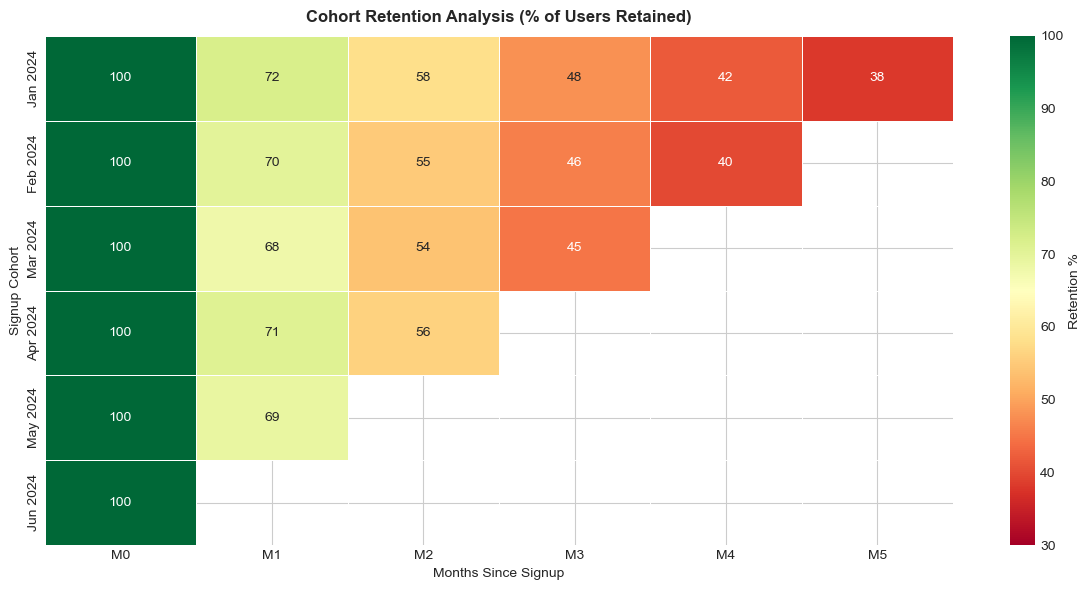

Chart 9 saved: Cohort Retention


In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

# Simulated cohort retention data (replace with actual calculation if data supports it)
cohorts = ['Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024']
months = ['M0', 'M1', 'M2', 'M3', 'M4', 'M5']

retention_data = np.array([
    [100, 72, 58, 48, 42, 38],
    [100, 70, 55, 46, 40, np.nan],
    [100, 68, 54, 45, np.nan, np.nan],
    [100, 71, 56, np.nan, np.nan, np.nan],
    [100, 69, np.nan, np.nan, np.nan, np.nan],
    [100, np.nan, np.nan, np.nan, np.nan, np.nan]
])

# Create heatmap
mask = np.isnan(retention_data)
sns.heatmap(retention_data, annot=True, fmt='.0f', cmap='RdYlGn', 
            xticklabels=months, yticklabels=cohorts, mask=mask,
            cbar_kws={'label': 'Retention %'}, vmin=30, vmax=100,
            linewidths=0.5, ax=ax)
ax.set_title('Cohort Retention Analysis (% of Users Retained)', fontweight='bold', pad=10)
ax.set_xlabel('Months Since Signup')
ax.set_ylabel('Signup Cohort')

plt.tight_layout()
plt.savefig('chart9_cohort_retention.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 9 saved: Cohort Retention")

---
## Chart 10: TAM SAM SOM Visualization

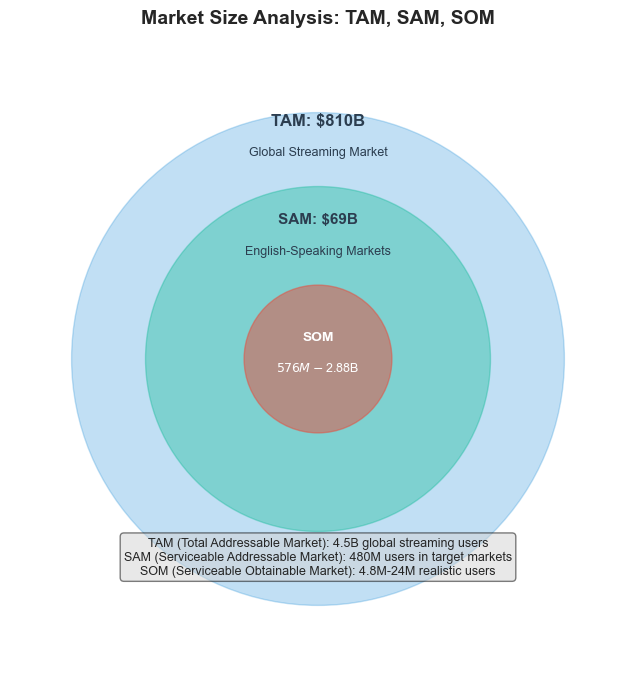

Chart 10 saved: TAM SAM SOM


In [14]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(10, 8))

# TAM
circle_tam = Circle((0.5, 0.5), 0.4, color='#3498DB', alpha=0.3)
ax.add_patch(circle_tam)
ax.text(0.5, 0.88, 'TAM: $810B', ha='center', fontsize=12, fontweight='bold', color='#2C3E50')
ax.text(0.5, 0.83, 'Global Streaming Market', ha='center', fontsize=9, color='#2C3E50')

# SAM
circle_sam = Circle((0.5, 0.5), 0.28, color='#1ABC9C', alpha=0.4)
ax.add_patch(circle_sam)
ax.text(0.5, 0.72, 'SAM: $69B', ha='center', fontsize=11, fontweight='bold', color='#2C3E50')
ax.text(0.5, 0.67, 'English-Speaking Markets', ha='center', fontsize=9, color='#2C3E50')

# SOM
circle_som = Circle((0.5, 0.5), 0.12, color='#E74C3C', alpha=0.5)
ax.add_patch(circle_som)
ax.text(0.5, 0.53, 'SOM', ha='center', fontsize=10, fontweight='bold', color='white')
ax.text(0.5, 0.48, '$576M-$2.88B', ha='center', fontsize=9, color='white')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Market Size Analysis: TAM, SAM, SOM', fontsize=14, fontweight='bold', pad=20)

# Add legend box
legend_text = """TAM (Total Addressable Market): 4.5B global streaming users
SAM (Serviceable Addressable Market): 480M users in target markets
SOM (Serviceable Obtainable Market): 4.8M-24M realistic users"""
ax.text(0.5, 0.15, legend_text, ha='center', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.savefig('chart10_tam_sam.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()
print("Chart 10 saved: TAM SAM SOM")

---
## Summary

All 10 charts have been generated and saved:

1. **chart1_monthly_trends.png** - Monthly engagement metrics (MAU, total minutes, avg session, sessions/user)
2. **chart2_device_content.png** - Device and content type distributions and averages
3. **chart3_subscription_tiers.png** - Subscription tier comparison
4. **chart4_device_trends.png** - Device usage trends over time (stacked area)
5. **chart5_heatmap.png** - Device × Content engagement heatmap
6. **chart6_mom_growth.png** - Month-over-month growth rate
7. **chart7_metrics_framework.png** - Watch Party metrics framework diagram
8. **chart8_financial_model.png** - Original vs Licensed content financial comparison
9. **chart9_cohort_retention.png** - Cohort retention heatmap
10. **chart10_tam_sam.png** - TAM SAM SOM market size visualization